# Import Libraries

In [37]:
import scipy as sp
import tensorflow as tf
from tensorflow import keras
import os
import numpy as np
import matplotlib.pyplot as plt
import plotly.plotly as plotly
import re

# Get Train & Test Set

In [38]:
train_directory = '/media/sf_Gee_Hard_Drive/Kaggle Data/the-simpsons-characters-dataset/simpsons_dataset/simpsons_dataset'
test_directory = '/media/sf_Gee_Hard_Drive/Kaggle Data/the-simpsons-characters-dataset/kaggle_simpson_testset/kaggle_simpson_testset'

classes = os.listdir(train_directory)
class_indices = np.arange(len(classes))

class_dict = dict(zip(classes, class_indices))
class_dict

{'abraham_grampa_simpson': 0,
 'agnes_skinner': 1,
 'apu_nahasapeemapetilon': 2,
 'barney_gumble': 3,
 'bart_simpson': 4,
 'bumblebee_man': 5,
 'carl_carlson': 6,
 'charles_montgomery_burns': 7,
 'chief_wiggum': 8,
 'cletus_spuckler': 9,
 'comic_book_guy': 10,
 'disco_stu': 11,
 'edna_krabappel': 12,
 'fat_tony': 13,
 'gil': 14,
 'groundskeeper_willie': 15,
 'hans_moleman': 16,
 'helen_lovejoy': 17,
 'homer_simpson': 18,
 'jasper_beardly': 19,
 'jimbo_jones': 20,
 'kent_brockman': 21,
 'krusty_the_clown': 22,
 'lenny_leonard': 23,
 'lionel_hutz': 24,
 'lisa_simpson': 25,
 'maggie_simpson': 26,
 'marge_simpson': 27,
 'martin_prince': 28,
 'mayor_quimby': 29,
 'milhouse_van_houten': 30,
 'miss_hoover': 31,
 'moe_szyslak': 32,
 'ned_flanders': 33,
 'nelson_muntz': 34,
 'otto_mann': 35,
 'patty_bouvier': 36,
 'principal_skinner': 37,
 'professor_john_frink': 38,
 'rainier_wolfcastle': 39,
 'ralph_wiggum': 40,
 'selma_bouvier': 41,
 'sideshow_bob': 42,
 'sideshow_mel': 43,
 'snake_jailbird'

In [39]:
# Loop over each folder of train directory and read pictures, storing pixel matrix, character-name, and label id
trainObj = []
for dirs in classes:
    directory = train_directory + '/' + dirs + '/'
    pics = os.listdir(directory)[0:2]
    for pic in pics:
        path = directory + pic
        pix = sp.misc.imread(path)
        trainObj.append([pix, dirs, class_dict[dirs]])
        
trainObj = np.array(trainObj)
trainObj.shape, trainObj[0][0].shape

/home/gclarkjr5/tensorflow/lib/python3.5/site-packages/ipykernel_launcher.py:8: DeprecationWarning:

`imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.



((84, 3), (432, 288, 3))

In [66]:
# Get all test images into a similar format given the one directory they are all in
test_pics = os.listdir(test_directory)[0:20]
ids = []
for pic in test_pics:
    if pic != '.DS_Store':
        path = test_directory + '/' + pic
        pix_array = sp.misc.imread(path)
        character_label = re.sub('_[0-9]{1,2}.jpg$', '', pic)
        ids.append([pix_array, character_label, class_dict[character_label]])
testObj = np.array(ids)
testObj.shape, testObj[0][0].shape

/home/gclarkjr5/tensorflow/lib/python3.5/site-packages/ipykernel_launcher.py:7: DeprecationWarning:

`imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.



array([[array([[[120, 115,  96],
        [120, 115,  96],
        [120, 115,  96],
        ...,
        [155, 125, 125],
        [155, 125, 123],
        [154, 126, 123]],

       [[120, 115,  96],
        [120, 115,  96],
        [120, 115,  96],
        ...,
        [155, 125, 125],
        [155, 125, 123],
        [154, 126, 123]],

       [[120, 115,  96],
        [120, 115,  96],
        [120, 115,  96],
        ...,
        [154, 126, 123],
        [155, 125, 123],
        [155, 125, 123]],

       ...,

       [[120,  47,  28],
        [120,  47,  28],
        [120,  47,  28],
        ...,
        [118,  46,  24],
        [117,  44,  25],
        [117,  44,  25]],

       [[116,  43,  24],
        [118,  45,  26],
        [121,  48,  29],
        ...,
        [115,  43,  21],
        [117,  44,  25],
        [117,  44,  25]],

       [[116,  43,  24],
        [117,  44,  25],
        [118,  45,  26],
        ...,
        [118,  46,  24],
        [117,  44,  25],
        [117,  4

# Print out the first 10 pics

/home/gclarkjr5/tensorflow/lib/python3.5/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning:

Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.



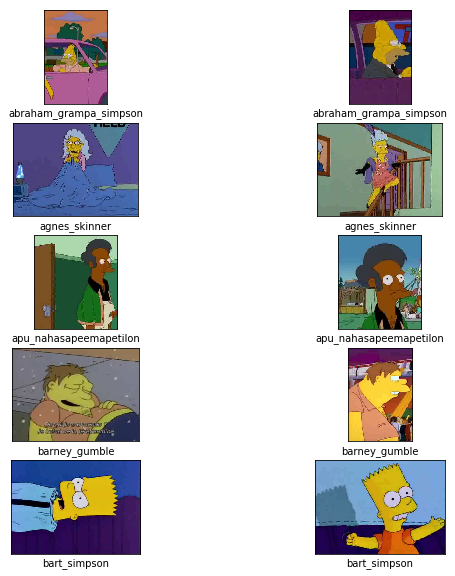

In [41]:
%matplotlib inline

plt.figure(figsize=(10,10))
for i in range(len(trainObj[0:10])):
    plt.subplot(5,2,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid('off')
    plt.imshow(trainObj[i][0], cmap=plt.cm.binary)
    plt.xlabel(trainObj[i][1])

# Filter for same dimensions

In [68]:
dim = (432, 288, 3)

def filterSameShape(obj, dim):
    filt = list(filter(lambda x: x[0].shape == dim, obj))
    filt = np.array(filt)
    return(filt)

trainPicsFiltered = filterSameShape(trainObj, dim)
trainPicsFiltered.shape, trainPicsFiltered[0][0].shape

array([[array([[[120, 115,  96],
        [120, 115,  96],
        [120, 115,  96],
        ...,
        [155, 125, 125],
        [155, 125, 123],
        [154, 126, 123]],

       [[120, 115,  96],
        [120, 115,  96],
        [120, 115,  96],
        ...,
        [155, 125, 125],
        [155, 125, 123],
        [154, 126, 123]],

       [[120, 115,  96],
        [120, 115,  96],
        [120, 115,  96],
        ...,
        [154, 126, 123],
        [155, 125, 123],
        [155, 125, 123]],

       ...,

       [[120,  47,  28],
        [120,  47,  28],
        [120,  47,  28],
        ...,
        [118,  46,  24],
        [117,  44,  25],
        [117,  44,  25]],

       [[116,  43,  24],
        [118,  45,  26],
        [121,  48,  29],
        ...,
        [115,  43,  21],
        [117,  44,  25],
        [117,  44,  25]],

       [[116,  43,  24],
        [117,  44,  25],
        [118,  45,  26],
        ...,
        [118,  46,  24],
        [117,  44,  25],
        [117,  4

# Verify images are same dims

/home/gclarkjr5/tensorflow/lib/python3.5/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning:

Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.



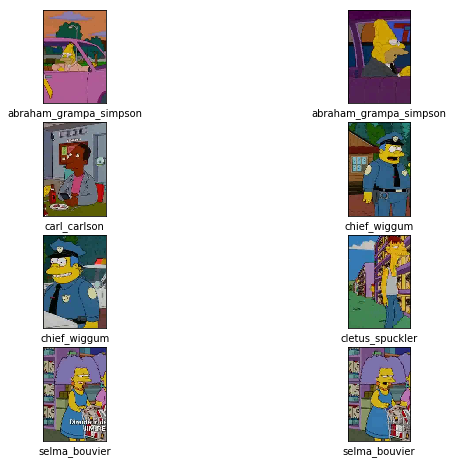

In [47]:
%matplotlib inline

plt.figure(figsize=(10,10))
for i in range(len(trainPicsFiltered[0:10])):
    plt.subplot(5,2,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid('off')
    plt.imshow(trainPicsFiltered[i][0], cmap=plt.cm.binary)
    plt.xlabel(trainPicsFiltered[i][1])

# PreProcess and convert 0-255 RGB to 0-1 range

In [72]:
def preProcess(obj):
    for i in range(len(obj)):
        obj[i][0] = obj[i][0]/255

preProcess(trainPicsFiltered)
preProcess(testObj)

trainPicsFiltered.shape, testObj.shape

((8, 3), (20, 3))

In [74]:
def imagesOrLabels(data, index):
    type = list(map(lambda x: x[index], data))
    type = np.array(type)
    return(type)
    
train_images = imagesOrLabels(trainPicsFiltered, 0)
train_labels = imagesOrLabels(trainPicsFiltered, 2)

test_images = imagesOrLabels(testObj, 0)
test_labels = imagesOrLabels(testObj, 2)

# train_images = list(map(lambda x: x[0], trainPicsFiltered))
# train_images = np.array(train_images)

# train_labels = list(map(lambda x: x[2], trainPicsFiltered))
# train_labels = np.array(train_labels)

# test_images = list(map(lambda x: x[0], testObj))
# test_images = np.array(train_images)

# test_labels = list(map(lambda x: x[2], testObj))
# test_labels = np.array(train_labels)

train_images.shape, train_labels.shape, test_images.shape, test_labels.shape
# train_images

((8, 432, 288, 3), (8,), (20,), (20,))

# Model Construction

## Model Layers

In [250]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(432, 288, 3)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

## Model Functions (optimizer, accuracy)

In [251]:
model.compile(optimizer=tf.train.AdamOptimizer(), 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

## Fit Model

In [252]:
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
242/242 [==============================] - 52s 213ms/step - loss: 0.8626 - acc: 0.8347
Epoch 2/5
242/242 [==============================] - 4s 16ms/step - loss: 0.5994 - acc: 0.9628
Epoch 3/5
242/242 [==============================] - 4s 15ms/step - loss: 0.5994 - acc: 0.9628
Epoch 4/5
242/242 [==============================] - 4s 15ms/step - loss: 0.5994 - acc: 0.9628
Epoch 5/5
242/242 [==============================] - 4s 15ms/step - loss: 0.5994 - acc: 0.9628
